In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [5]:
## read the dataset
df = pd.read_csv('Visadataset.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
## chech no of records in dataset
print("No of records in dataset: {}".format(df.shape[0]))

No of records in dataset: 25480


In [7]:
## check information of data null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


##### Insights:
- no null values in dataset and data set contains dtypes: float64(1), int64(2), object(9)

In [8]:
## separate the columns
def columns(df) :# -> dict[str, Any]:
    columns = {
        'all_columns':df.columns.to_list(),
        'categorical_columns': df.select_dtypes(include='object').columns.to_list(),
        'numerical_columns': df.select_dtypes(exclude='object').columns.to_list()
    }
    return columns
column_detials = columns(df)

print(f"All columns : {column_detials['all_columns']}")
print(f"Categorical columns : {column_detials['categorical_columns']}")
print(f"Numerical columns : {column_detials['numerical_columns']}")

All columns : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'no_of_employees', 'yr_of_estab', 'region_of_employment', 'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status']
Categorical columns : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
Numerical columns : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


In [9]:
## plot numerical columns

def plot_numerical_columns(df,columns): 
    ncols = len(columns)
    # print(nrows)
    
    if len(columns)%2==0:
        nrows = ncols // 2
    else:
        nrows = (ncols // 2) + 1
            
    plt.figure(figsize=(15,7))
    
    for index,column in enumerate(columns):
        min_value = df[column].min()
        avg_value = df[column].mean()
        max_value = df[column].max()
        
        print(f"Detials of {column}")
        print(f"min: {min_value}, max: {max_value}, avg: {avg_value}")  
        print("================================================")   
           
        plt.subplot(nrows, ncols,index+1)
        sns.histplot(df[column],kde=True)
        plt.xlabel(column)
        plt.xticks(rotation=45)
        
    plt.suptitle('plotting numerical features',fontsize=16) 
    
    plt.tight_layout()
    plt.show()       
    
    
def plot_categorical_columns(df,columns): 
    # ncols = len(columns)
    # # print(nrows)
    
    # if len(columns)%2==0:
    #      nrows = ncols // 2
    # else:
    #     nrows = (ncols // 2)+1
            
    
    
    for column in columns:
        value_count = (df[column].value_counts(normalize=True)*100).round(2).to_dict()
               
        # print(f"Detials of {column}")
        # print(f"value_count: {value_count}")  
        # print("================================================")   
        # # plt.figure(figsize=(10,7))   
        # plt.subplot(nrows,2,index+1)
        sns.histplot(df[column])
        plt.xlabel(f'{value_count}')
        plt.xticks(rotation=45)
        
        plt.title(f'plotting feature: {column}',fontsize=16) 
    
        plt.tight_layout()
        plt.show()       
        
    

Detials of no_of_employees
min: -26, max: 602069, avg: 5667.043210361067
Detials of yr_of_estab
min: 1800, max: 2016, avg: 1979.409929356358
Detials of prevailing_wage
min: 2.1367, max: 319210.27, avg: 74455.81459209183


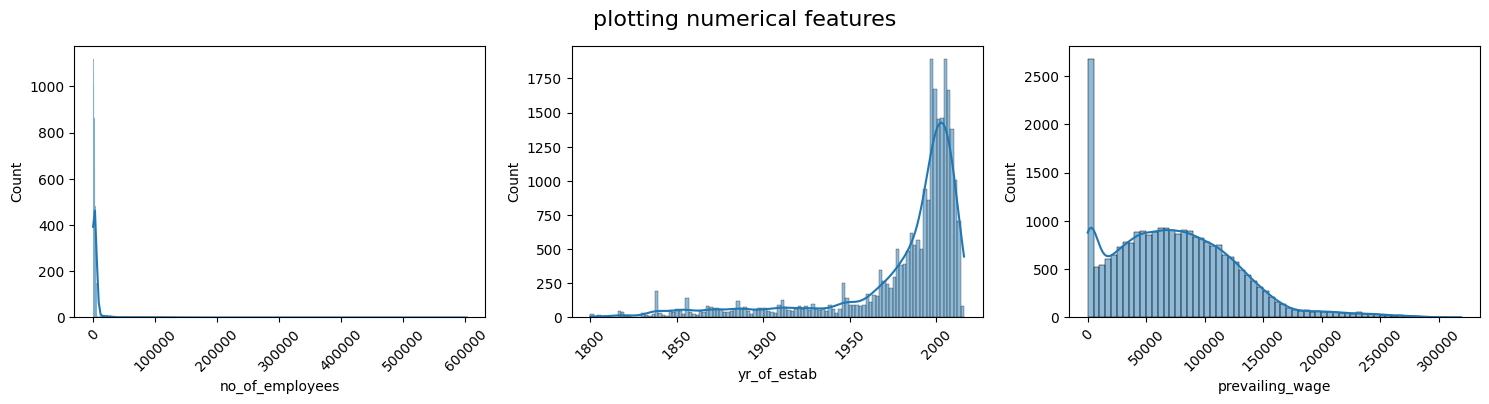

In [10]:
plot_numerical_columns(df,column_detials['numerical_columns'])

### Insights & Questions:

#### Insights:
- <u>no_of_employees</u> :minimum employees in company is -26 so there is chance of hesitation of putting data.
- <u>no_of_employees</u> :The maximum number of employees in the company is 602069, and the average number of employees in the company is 5667. Therefore, there are outliers evident when plotted.
- <u>yr_of_estab</u>     :Companies have been established between 1800 and 2016 according to the data records.
- <u>yr_of_estab</u>     :Most of the companies were established between 1979 and 2002.
- <u>prevailing_wage</u> :The minimum prevailing wage is 2.1367, and it may be hourly based, while the maximum is 319210 on a yearly basis.
- <u>prevailing_wage</u> :Employees can expect an average salary of 74455.

#### Questions:
1. Due to the presence of negative values (-26 to 0) for the number of employees, could you check the records within this range?
2. The minimum prevailing wage is 2.1367 - could you confirm if it is hourly-based or not? Typically, lower wages are paid hourly and higher wages are paid yearly.

In [11]:
# check 1. In no_of_employees there is change of hesition of putting data so check records between the  no of employees value in between -26 to 0 ?
test_df_q1 = df[df['no_of_employees']<=0]
test_df_q1

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [12]:
test_df_q1['no_of_employees'].value_counts()

no_of_employees
-11    9
-14    8
-26    7
-25    5
-17    4
Name: count, dtype: int64

##### Insight- indepth data
- When dealing with data, if there is only one value like -26, it is generally considered a nan value. However, in this case, there are 5 categories, so let's explore in depth to see if these values are related to any other column.

In [13]:
test1_columns  = test_df_q1.columns.to_list()[1:]
test1_columns

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'no_of_employees',
 'yr_of_estab',
 'region_of_employment',
 'prevailing_wage',
 'unit_of_wage',
 'full_time_position',
 'case_status']

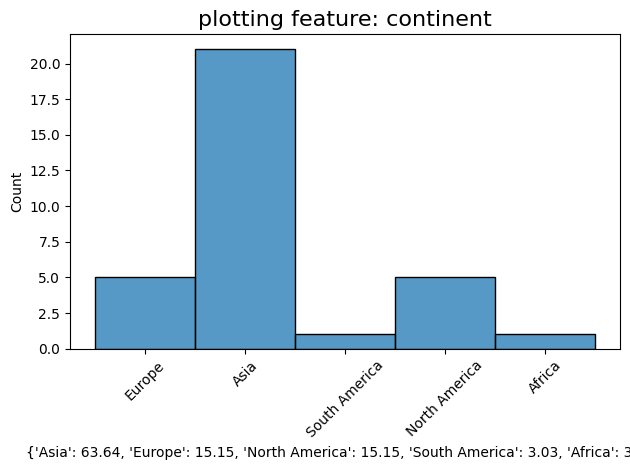

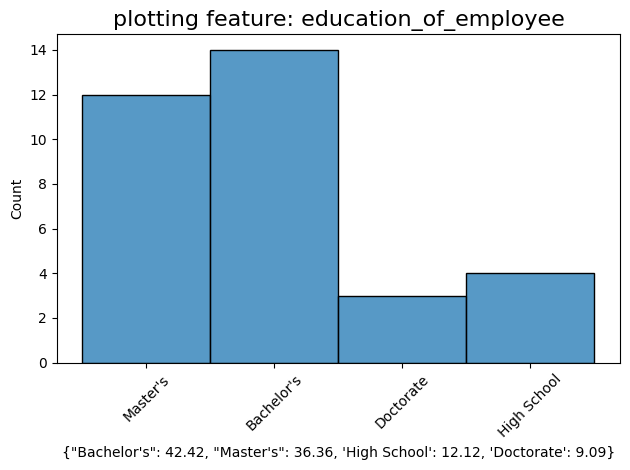

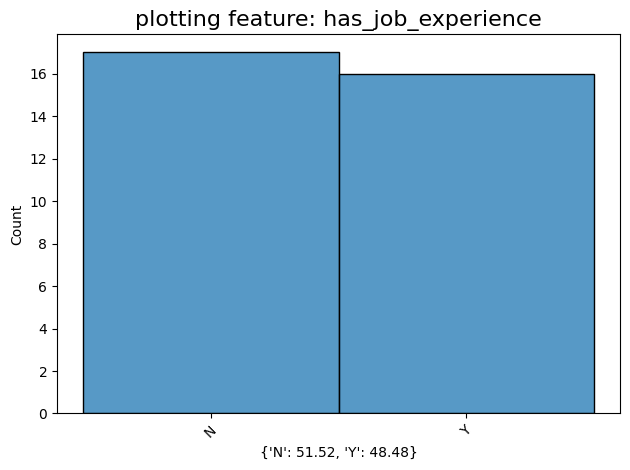

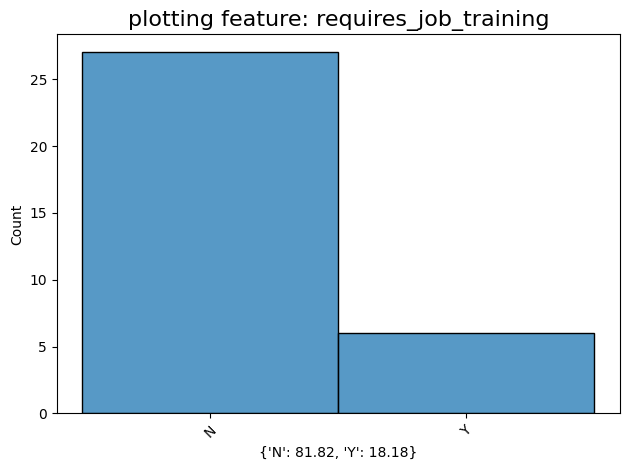

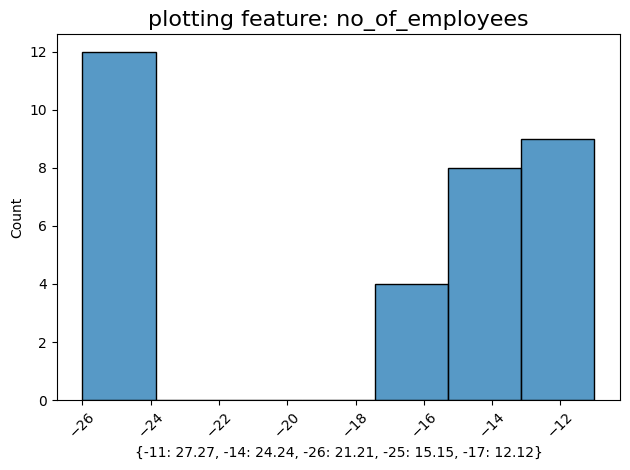

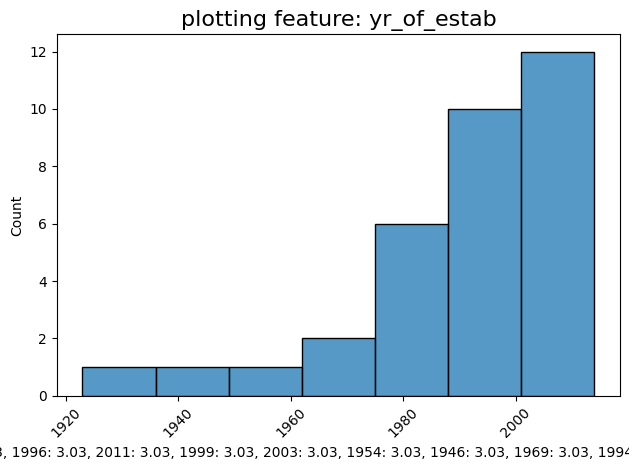

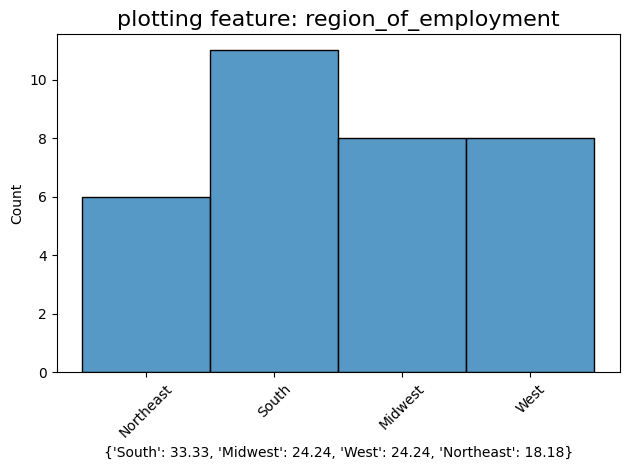

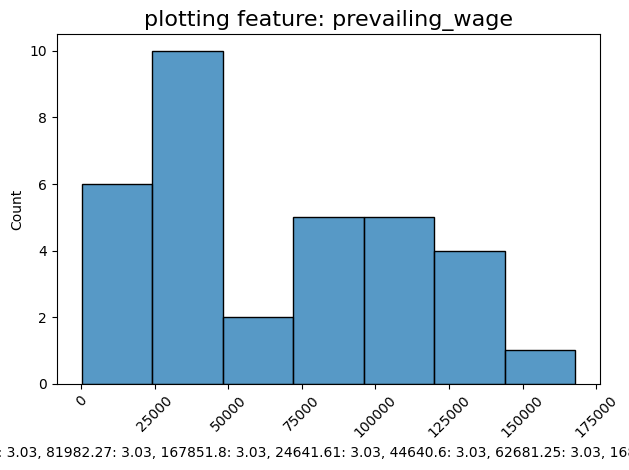

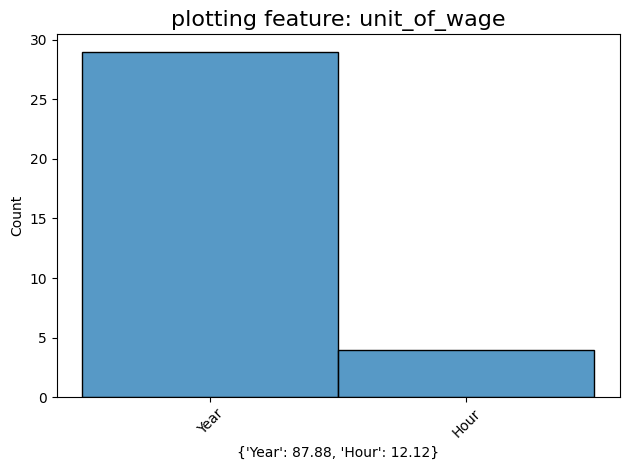

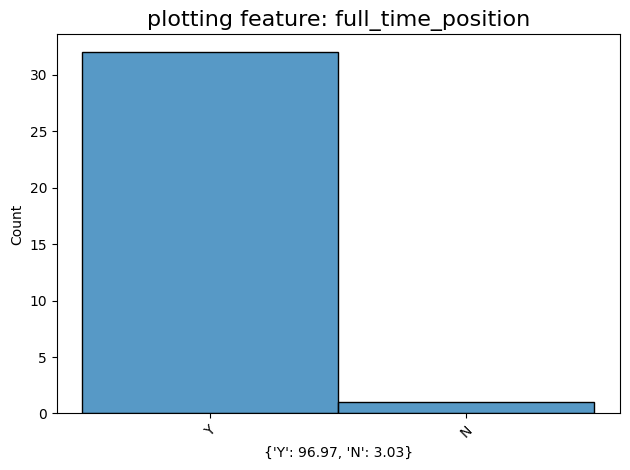

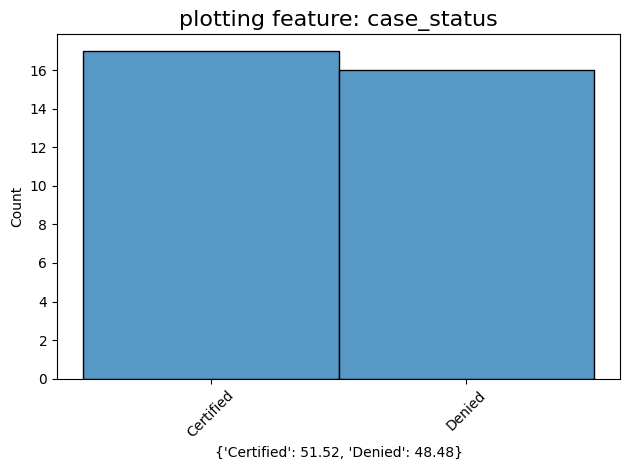

In [14]:
plot_categorical_columns(test_df_q1, test1_columns)

#### Insights- indepth data:
- Most of the data is from the continent Asia and the education information pertains to Bachelors. Additionally, half of the data for case status is certified, so we should keep it as it is.

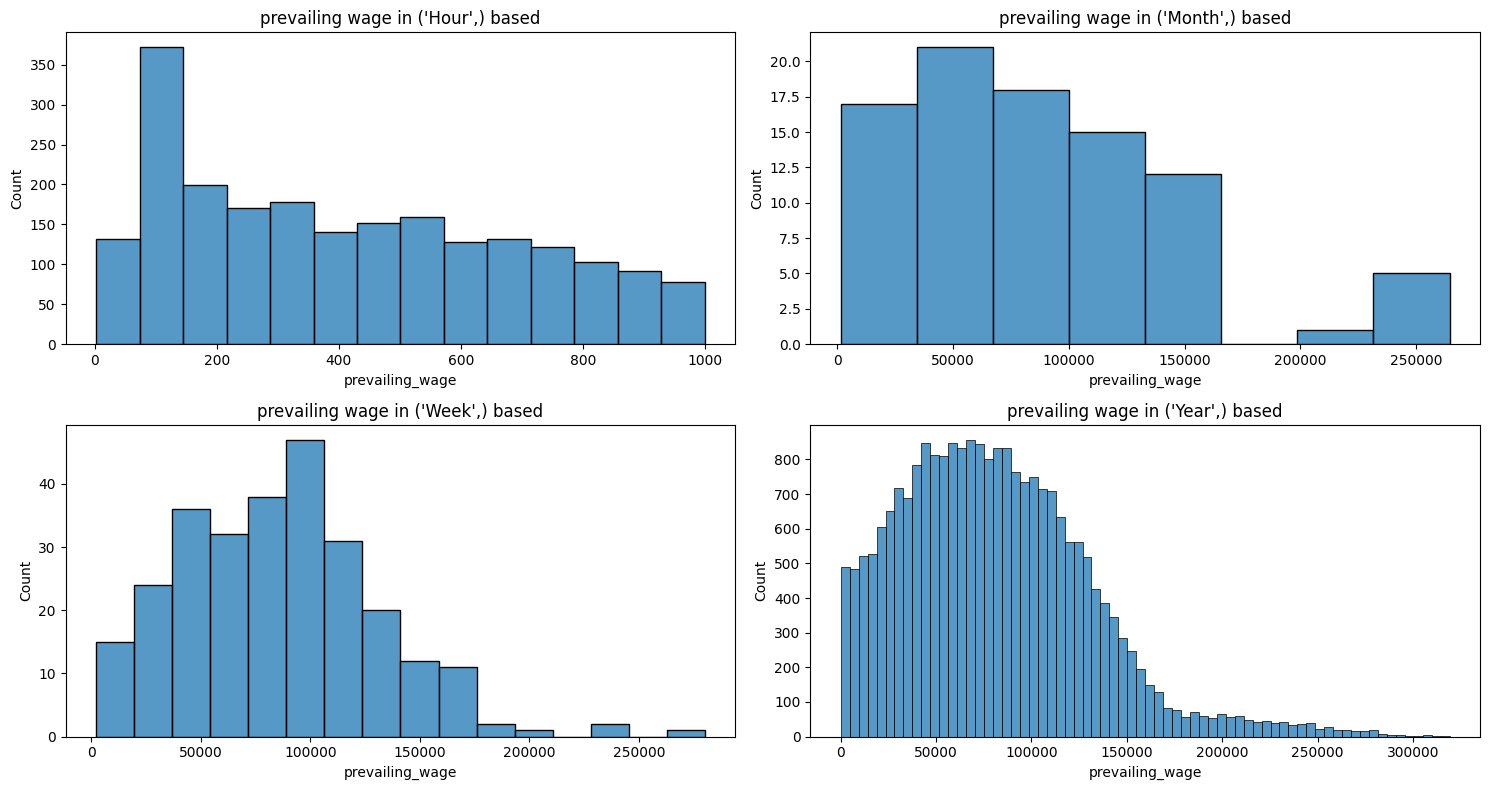

In [15]:
## 2. In prevailing wage contains minimum=2.1367 check it will be hourly based or not because pay low wage in hourly in general and also high wage in yearly or not?

g2 = df.groupby(['unit_of_wage'])
idx = 1 
plt.figure(figsize=(15,8))
for key,_ in g2:
    plt.subplot(2,2,idx)
    sns.histplot((g2.get_group(key)['prevailing_wage']))
    plt.title(f'prevailing wage in {key} based')
    idx += 1
    
plt.tight_layout()
plt.show()    

#### Insight- indepth data
- There is a low prevailing wage, which is mostly hourly-based.

In [16]:
column_detials

{'all_columns': ['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'no_of_employees',
  'yr_of_estab',
  'region_of_employment',
  'prevailing_wage',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 'categorical_columns': ['case_id',
  'continent',
  'education_of_employee',
  'has_job_experience',
  'requires_job_training',
  'region_of_employment',
  'unit_of_wage',
  'full_time_position',
  'case_status'],
 'numerical_columns': ['no_of_employees', 'yr_of_estab', 'prevailing_wage']}

In [17]:
def plot_categorical_columns(df,column): 
    # ncols = len(columns)
    # # print(nrows)
    
    # if len(columns)%2==0:
    #      nrows = ncols // 2
    # else:
    #     nrows = (ncols // 2)+1
            
    
    
    # for column in columns:
    value_count = (df[column].value_counts(normalize=True)*100).round(2).to_dict()
    final_value_count_data = {k:f'{v}%' for k,v in value_count.items()}
    # print(f"Detials of {column}")
    # print(f"value_count: {value_count}")  
    # print("================================================")   
    plt.figure(figsize=(10,4))   
    # plt.subplot(nrows,2,index+1)
    sns.histplot(df[column])
    plt.xlabel(f'{final_value_count_data}')
    # plt.xticks(rotation=45)
    
    plt.title(f'plotting feature: {column}',fontsize=16) 

    plt.tight_layout()
    plt.show()       

In [18]:
### Let explore categorical features
categorical_features = column_detials['categorical_columns'][1:]
categorical_features

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

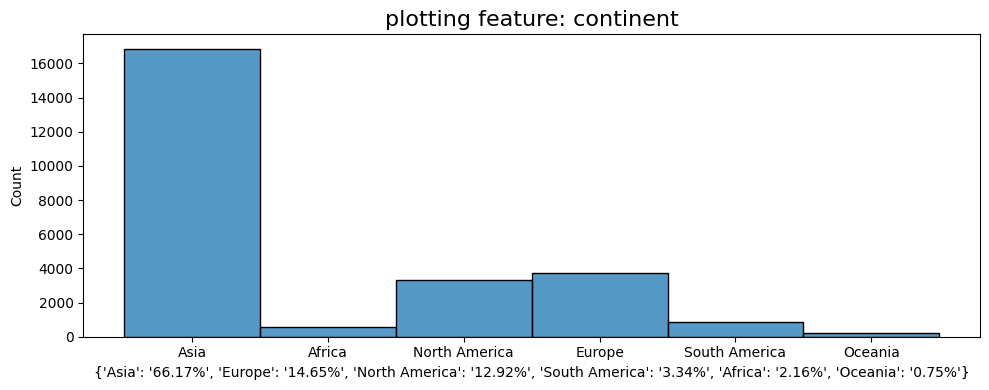

In [19]:
## let explore continent
plot_categorical_columns(df,categorical_features[0])

#### Insights:
- A large majority of the applications are from Asia, with more than 16000 applications, making up 66% of the entire dataset.

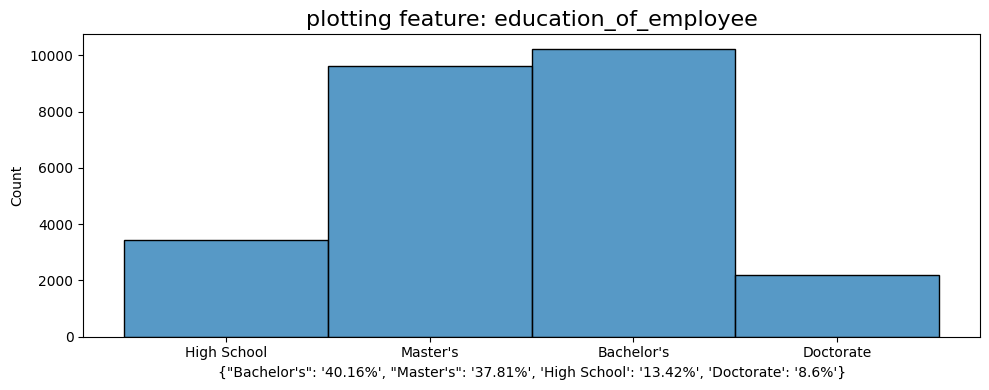

In [104]:
## let explore educaiton_of_employee
plot_categorical_columns(df,categorical_features[1])

#### Insights:
- Degree related to Bachelor's and Master's programs typically receive more applications.

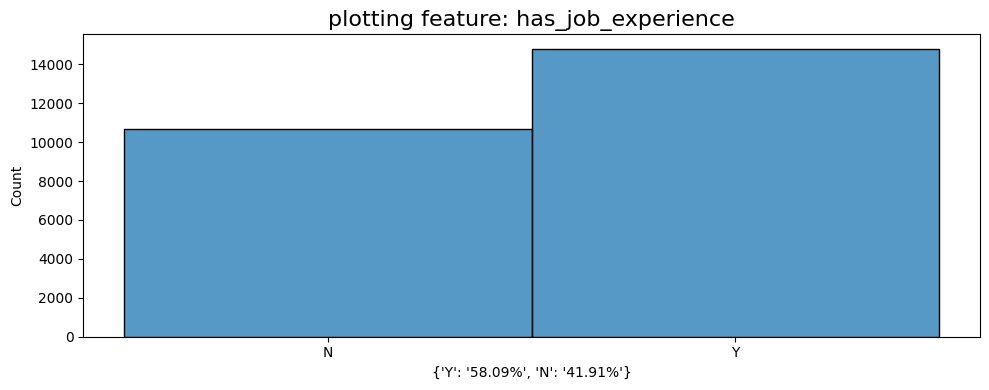

In [106]:
## let explore has_job_experiece
plot_categorical_columns(df,categorical_features[2])

# Insight:
- More than 14000 applications, which is equal to 58% of the entire data, have job experience.

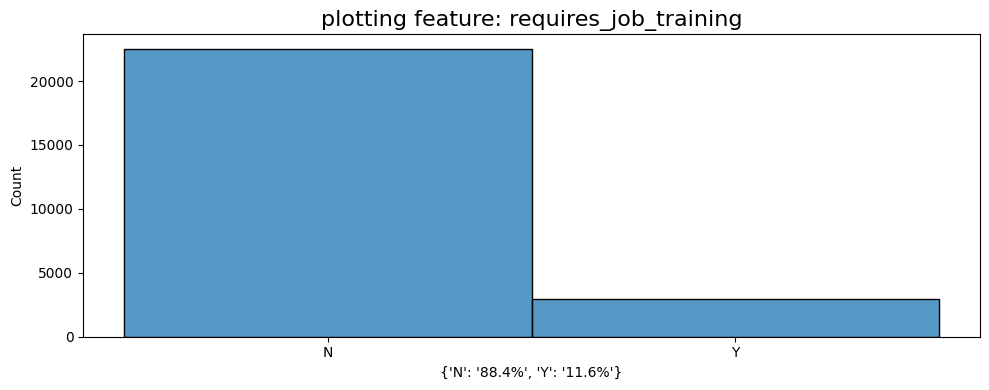

In [108]:
## let explore requires_job_training
plot_categorical_columns(df,categorical_features[3])

#### Insight:
- 88% of applications do not require training for the job.

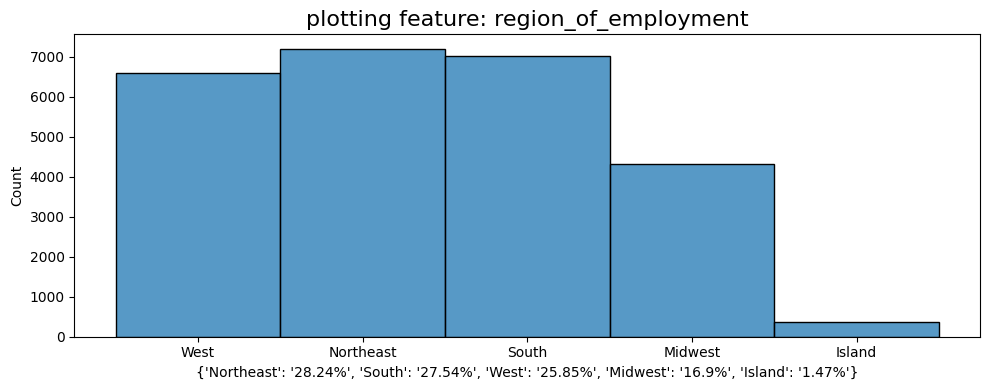

In [110]:
## let explore  region of employment 
plot_categorical_columns(df,categorical_features[4])

#### insight:
- More people have shown interest in jobs in the Northeast (more than 7000 applications, 28% of the entire applications) and the South (more than 6000 applications, 27.54% of the entire applications).
- One of the major reasons for the interest in the Northeast and South is the economic opportunities.
- The Northeast is home to major financial hubs like New York City and Boston, offering abundant job opportunities in finance, technology, education, and healthcare.
- The Southeast has experienced significant economic growth in recent decades, with cities like Atlanta, Charlotte, and Miami becoming major business and cultural centers.

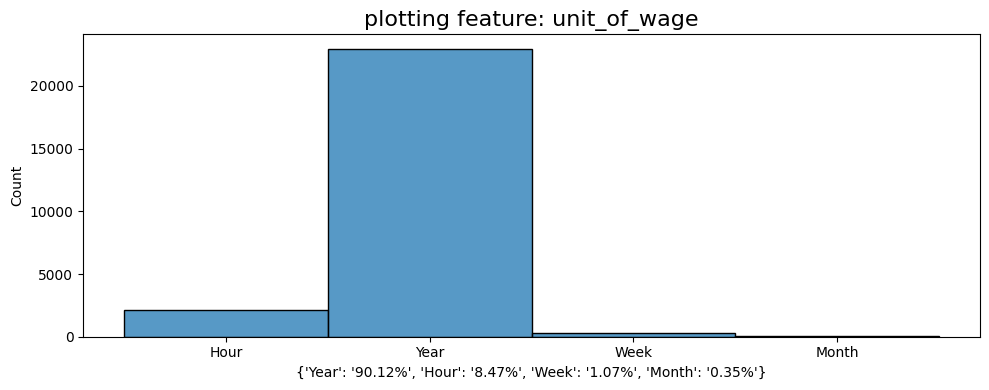

In [112]:
## let explore  Unit of wage 
plot_categorical_columns(df,categorical_features[5])

#### Insight:
- Most companies have shown interest in paying wages in yearly payments, with more than 20000 application data indicating that 90% of entire applications are based on a yearly pay structure.


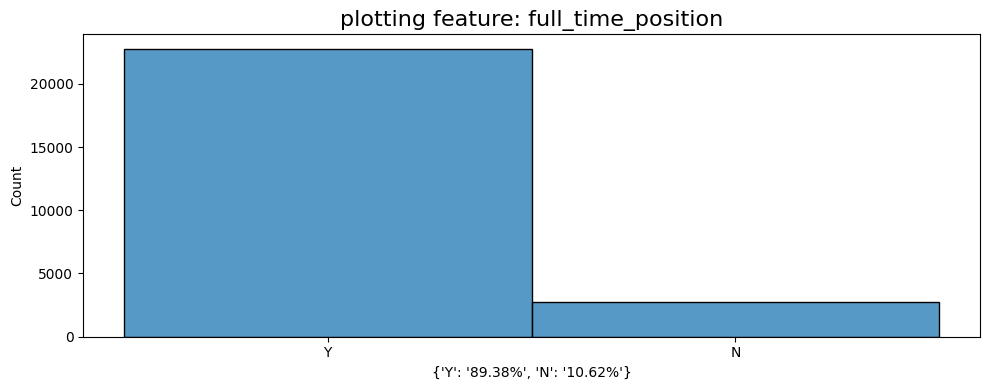

In [114]:
## let explore full_time_postion 
plot_categorical_columns(df,categorical_features[6])

#### Insight:
-  Most applications require full-time positions in the job, accounting for 89.38% of all applications.

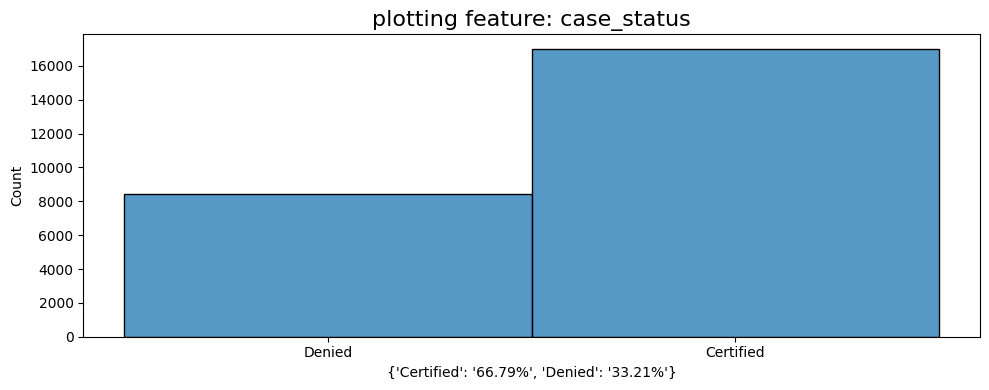

In [116]:
## let explore case_status 
plot_categorical_columns(df,categorical_features[7])

#### Insight:
- The "case_status," our target feature, is mostly related to certified applications, accounting for 66.79% of the entire dataset, which indicates that it is an imbalanced dataset.

### Let explore some more information

### Exploration 1:
1. What continent has the highest/lowest number of bachelor degree applications received?
2. What continent has the highest/lowest number of master's degree applications received?
3. What continent has the highest/lowest number of doctorate degree applications received?
4. What continent has the highest/lowest number of high school degree applications received?


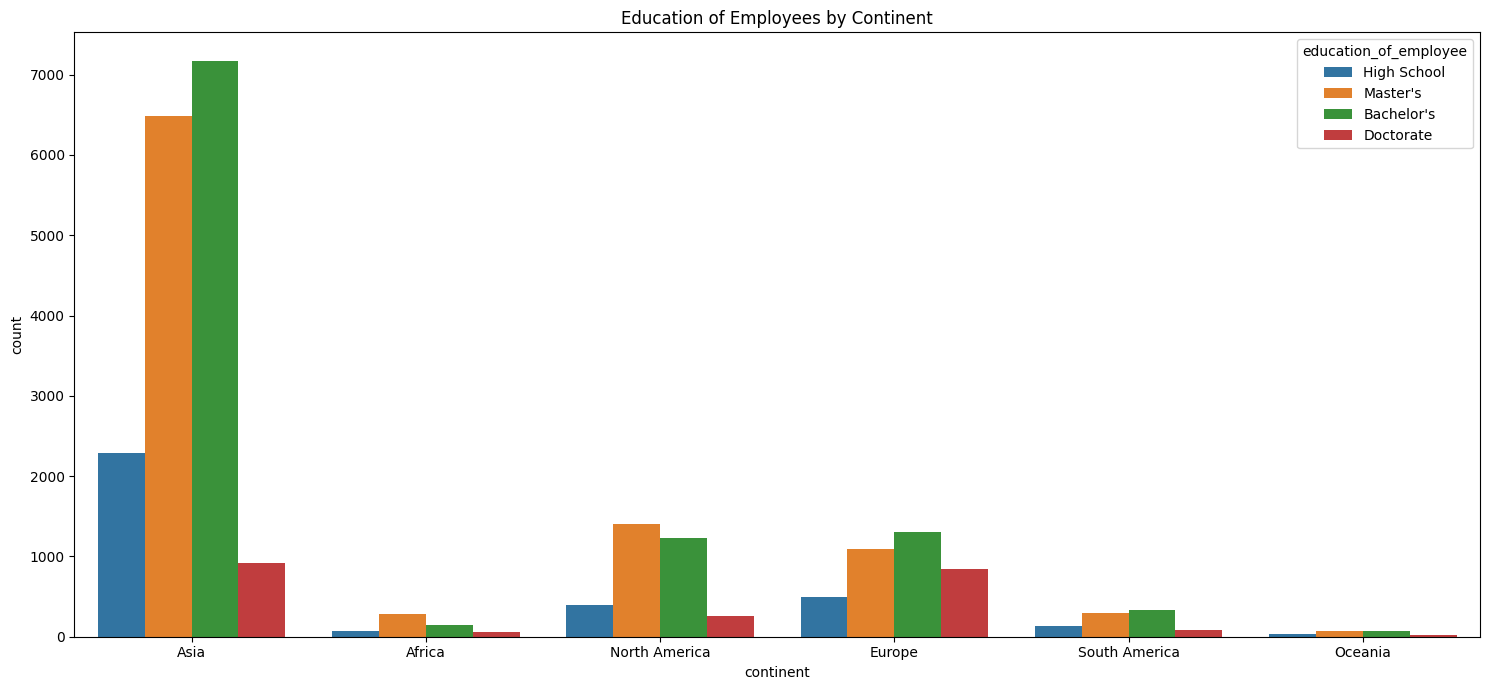

In [17]:

plt.figure(figsize=(15, 7))

sns.countplot(data=df, x='continent', hue='education_of_employee', dodge=True)


plt.title('Education of Employees by Continent')
plt.tight_layout()
plt.show()

#### Insights:

1. Applications from both Bachelor's and Master's degree holders are high in all continents.
2. Applications from Master's degree holders are particularly high in North America and Africa.
3. Applications from Bachelor's degree holders are particularly high in Asia and Europe.
4. Applications from Doctorate degree holders are high in Europe.
5. Applications from high school level students are low across all continents.

#### Explanation2:
1. Which continent offers high levels of job experience for job applications?
2. Which continent offers low levels of job experience for job applications?
3. Which educational degree is associated with high job experience?
4. Which educational degree is associated with low job experience?


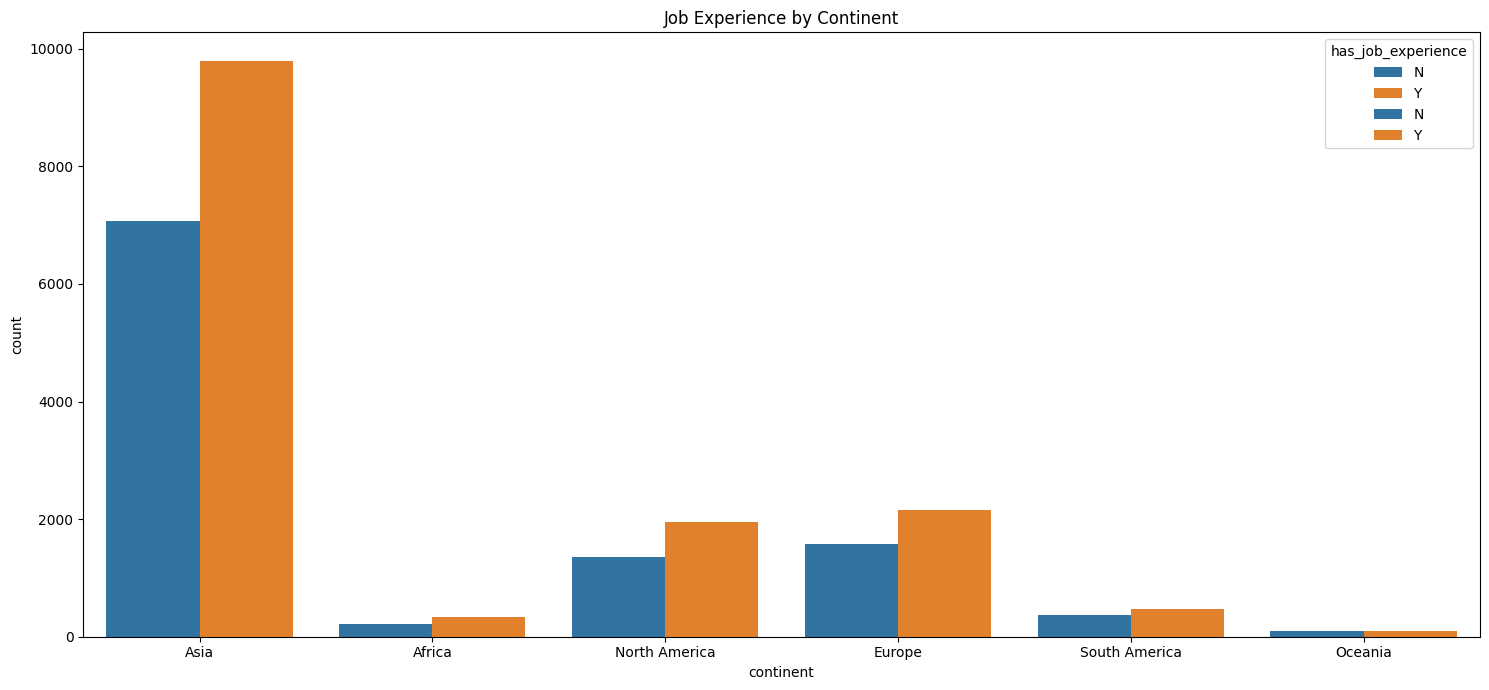

In [20]:
# 1. Which continent has a high level of job experience for applications?
# 2. Which continent has a low level of job experience for applications?
plt.figure(figsize=(15, 7))

ax = sns.countplot(data=df, x='continent', hue='has_job_experience', dodge=True)


sns.countplot(data=df, x='continent', hue='has_job_experience', dodge=True,)


plt.title('Job Experience by Continent')
plt.tight_layout()
plt.show()    

#### Insights:
As per the visa application, all continents have high job experience in applications.

<b>Go In Depth:</b>
1. Find the continents with the highest and lowest job experience compared to the entire continent data of 25480 records. 
2. Find the continents with the highest and lowest job experience compared to their individual continent.




In [21]:
class DataComparision:
    def __init__(self):
        pass
    def compare_with_entire_data(self,df,index_column, compared_column):
        
        # Calculate percentage of each group within each continent
        percentage = ((df.groupby([index_column,compared_column]).size() / df.shape[0])*100).round(2).reset_index(name='percentage')

        # Pivot to make it a more readable DataFrame
        result_df = percentage.pivot(index=index_column, columns=compared_column, values='percentage').reset_index()
        result_df.columns.name = None  # Remove the axis name
        # print(f'{compared_column} compared to the entire continent data of 25480 records')
        # result_df = result_df.style.set_caption(f'{compared_column} compared to the entire continent data of 25480 records')
        
        return result_df

    

    def compare_with_individual_data(self,df,index_column, compared_column):
        
        # Calculate percentage of each group within each continent
        percentage = (df.groupby([index_column,compared_column]).size() / df.groupby([index_column]).size() * 100).round(2).reset_index(name='percentage')

        # Pivot to make it a more readable DataFrame
        result_df = percentage.pivot(index=index_column, columns=compared_column, values='percentage').reset_index()
        result_df.columns.name = None  # Remove the axis name
        
        # print(f'{compared_column} compare_with_individual_data')
        # result_df = result_df.style.set_caption
        
        return result_df
    
    def plot_comparision_data(self,x_data,hue_data):
        plt.figure(figsize=(15,7))
        sns.countplot(data=df, x=x_data, hue=hue_data,dodge=True )

        plt.title(f'{hue_data} by {x_data}')
        plt.tight_layout()
        plt.show()    




    def  get_compared_detials(self,df,index_column, compared_column): 
        # Get the two separate DataFrames
        entire_data_df = self.compare_with_entire_data(df=df, index_column=index_column, compared_column=compared_column)
        individual_data_df = self.compare_with_individual_data(df=df, index_column=index_column, compared_column=compared_column)

        # Merge the DataFrames on the index column 
        combined_df = pd.merge(entire_data_df, individual_data_df, on=index_column)

        columns = [index_column,'N_entire_data','Y_entire_data','N_individual_data','Y_individual_data']

        
        combined_df.columns = columns
        
        
        result = {
            'data_frame': combined_df,
            'insight_data': {
                f'High {compared_column} with {index_column} Entire_data comparision': combined_df[combined_df['Y_entire_data'] == combined_df['Y_entire_data'].max()][index_column].values[0],
                f'Low {compared_column} with {index_column} Entire_data comparision': combined_df[combined_df['N_entire_data'] == combined_df['N_entire_data'].min()][index_column].values[0],
                f'High {compared_column} with {index_column} individual comparision': combined_df[combined_df['Y_individual_data'] == combined_df['Y_individual_data'].max()][index_column].values[0],
                f'Low {compared_column} with {index_column} individual comparision': combined_df[combined_df['N_individual_data'] == combined_df['N_individual_data'].min()][index_column].values[0],
                }
            
        }
        
        self.plot_comparision_data(index_column,compared_column)
        
        return result
        
        

In [22]:
dc = DataComparision()

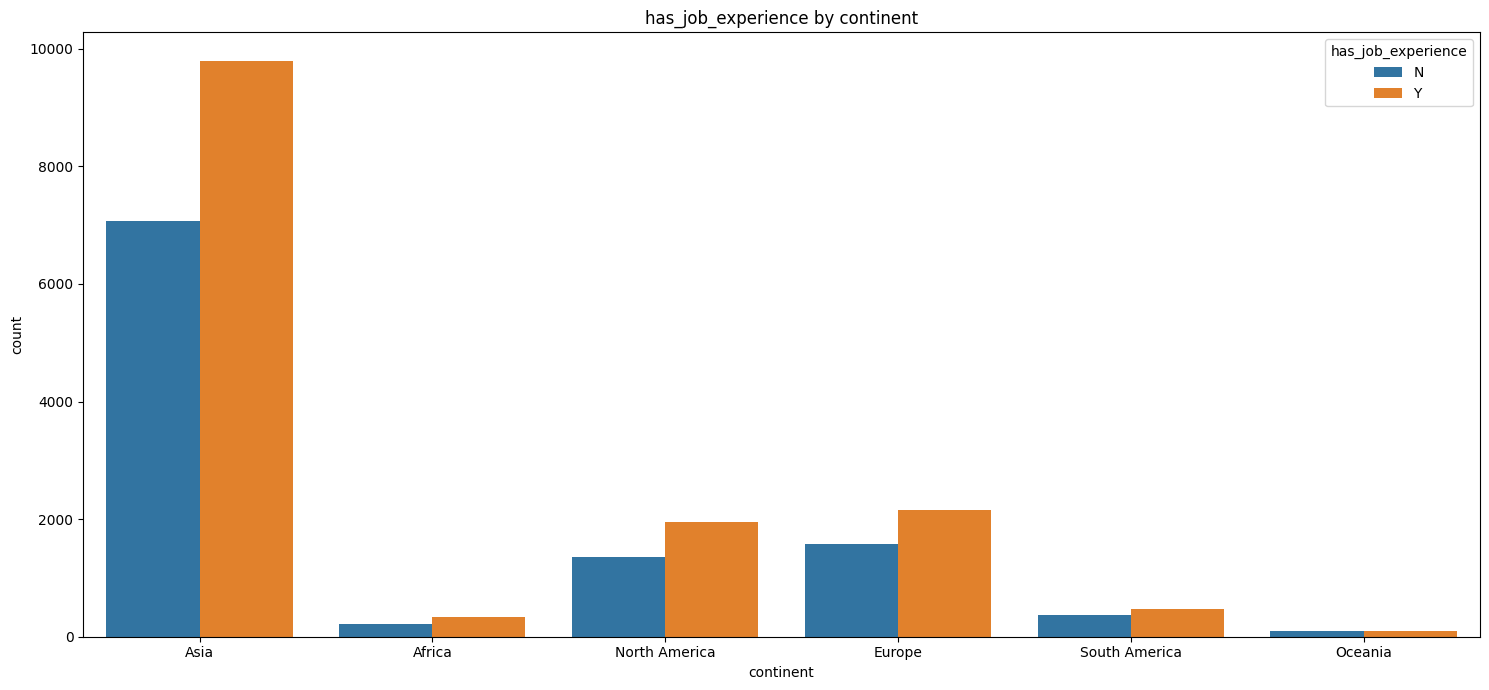

,continent,N_entire_data,Y_entire_data,N_individual_data,Y_individual_data
0,Africa,0.85,1.31,39.38,60.62
1,Asia,27.75,38.42,41.94,58.06
2,Europe,6.19,8.46,42.23,57.77
3,North America,5.29,7.63,40.95,59.05
4,Oceania,0.35,0.40,46.35,53.65
5,South America,1.48,1.86,44.25,55.75


In [23]:
result = dc.get_compared_detials(df=df,index_column='continent',compared_column='has_job_experience')
pd.DataFrame(result['data_frame'])


In [24]:
for i,j in result['insight_data'].items():
    print(f'- {i}: {j}')

- High has_job_experience with continent Entire_data comparision: Asia
- Low has_job_experience with continent Entire_data comparision: Oceania
- High has_job_experience with continent individual comparision: Africa
- Low has_job_experience with continent individual comparision: Africa


#### Insight:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>continent</th>
      <th>N_entire_data</th>
      <th>Y_entire_data</th>
      <th>N_individual_data</th>
      <th>Y_individual_data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Africa</td>
      <td>0.85</td>
      <td>1.31</td>
      <td>39.38</td>
      <td>60.62</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Asia</td>
      <td>27.75</td>
      <td>38.42</td>
      <td>41.94</td>
      <td>58.06</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Europe</td>
      <td>6.19</td>
      <td>8.46</td>
      <td>42.23</td>
      <td>57.77</td>
    </tr>
    <tr>
      <th>3</th>
      <td>North America</td>
      <td>5.29</td>
      <td>7.63</td>
      <td>40.95</td>
      <td>59.05</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Oceania</td>
      <td>0.35</td>
      <td>0.40</td>
      <td>46.35</td>
      <td>53.65</td>
    </tr>
    <tr>
      <th>5</th>
      <td>South America</td>
      <td>1.48</td>
      <td>1.86</td>
      <td>44.25</td>
      <td>55.75</td>
    </tr>
  </tbody>
</table>
</div>


- High job experience compared to entire continent data: Asia
- Low job experience compared to entire continent data: Oceania
- High job experience compared to individual continent: Africa
- Low job experience compared to individual continent: Africa


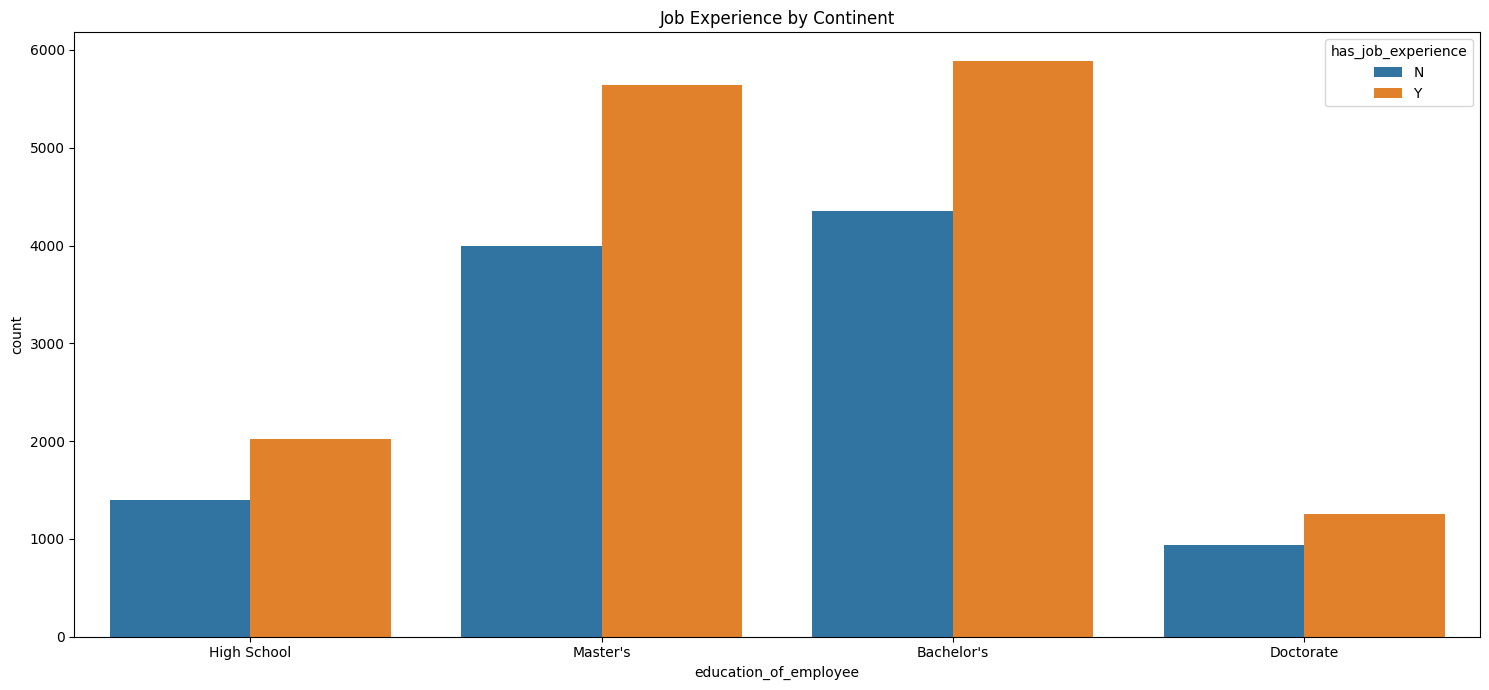

In [175]:
# 3. Which education degree is associated with high job experience?
# 4. Which education degree is associated with low job experience?

plt.figure(figsize=(15, 7))

# ax = sns.countplot(data=df, x='education_of_employee', hue='has_job_experience', dodge=True)


sns.countplot(data=df, x='education_of_employee', hue='has_job_experience', dodge=True,)


plt.title('Job Experience by Continent')
plt.tight_layout()
plt.show()    

#### Insights:
According to the application, all continents have high job experience in applications.

1. Find the education level of employees with the highest and lowest job experience compared to the entire continent dataset of 25480 records. 
2. Find the education level of employees with the highest and lowest job experience compared to their respective continent datasets.

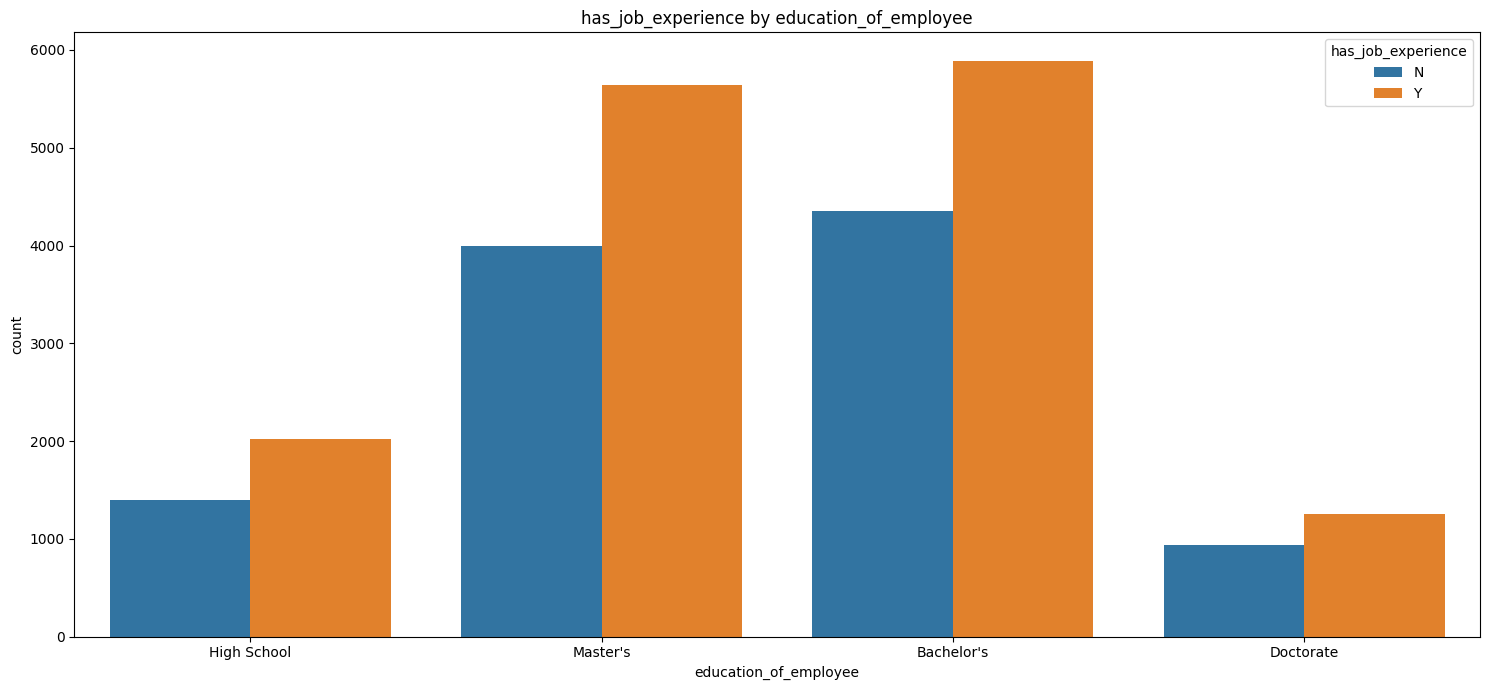

,education_of_employee,N_entire_data,Y_entire_data,N_individual_data,Y_individual_data
0,Bachelor's,17.06,23.10,42.49,57.51
1,Doctorate,3.69,4.91,42.93,57.07
2,High School,5.48,7.94,40.82,59.18
3,Master's,15.67,22.14,41.45,58.55


In [25]:
result = dc.get_compared_detials(df=df,index_column='education_of_employee', compared_column='has_job_experience')

result['data_frame']

In [26]:
for i,j in result['insight_data'].items():
    print(f'- {i}: {j}')

- High has_job_experience with education_of_employee Entire_data comparision: Bachelor's
- Low has_job_experience with education_of_employee Entire_data comparision: Doctorate
- High has_job_experience with education_of_employee individual comparision: High School
- Low has_job_experience with education_of_employee individual comparision: High School


#### Insight:
Note: values are in the format of percentage
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>education_of_employee</th>
      <th>N_entire_data</th>
      <th>Y_entire_data</th>
      <th>N_individual_data</th>
      <th>Y_individual_data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Bachelor's</td>
      <td>17.06</td>
      <td>23.10</td>
      <td>42.49</td>
      <td>57.51</td>
    </tr>
    <tr>
      <td>Doctorate</td>
      <td>3.69</td>
      <td>4.91</td>
      <td>42.93</td>
      <td>57.07</td>
    </tr>
    <tr>
      <td>High School</td>
      <td>5.48</td>
      <td>7.94</td>
      <td>40.82</td>
      <td>59.18</td>
    </tr>
    <tr>
      <td>Master's</td>
      <td>15.67</td>
      <td>22.14</td>
      <td>41.45</td>
      <td>58.55</td>
    </tr>
  </tbody>
</table>
</div>

- High job experience with employees' education comparison: Bachelor's
- Low job experience with employees' education comparison: Doctorate
- High job experience with individual employee's education: High School
- Low job experience with individual employee's education: High School


##### Which continent employees require high job training mentioned in their applications?

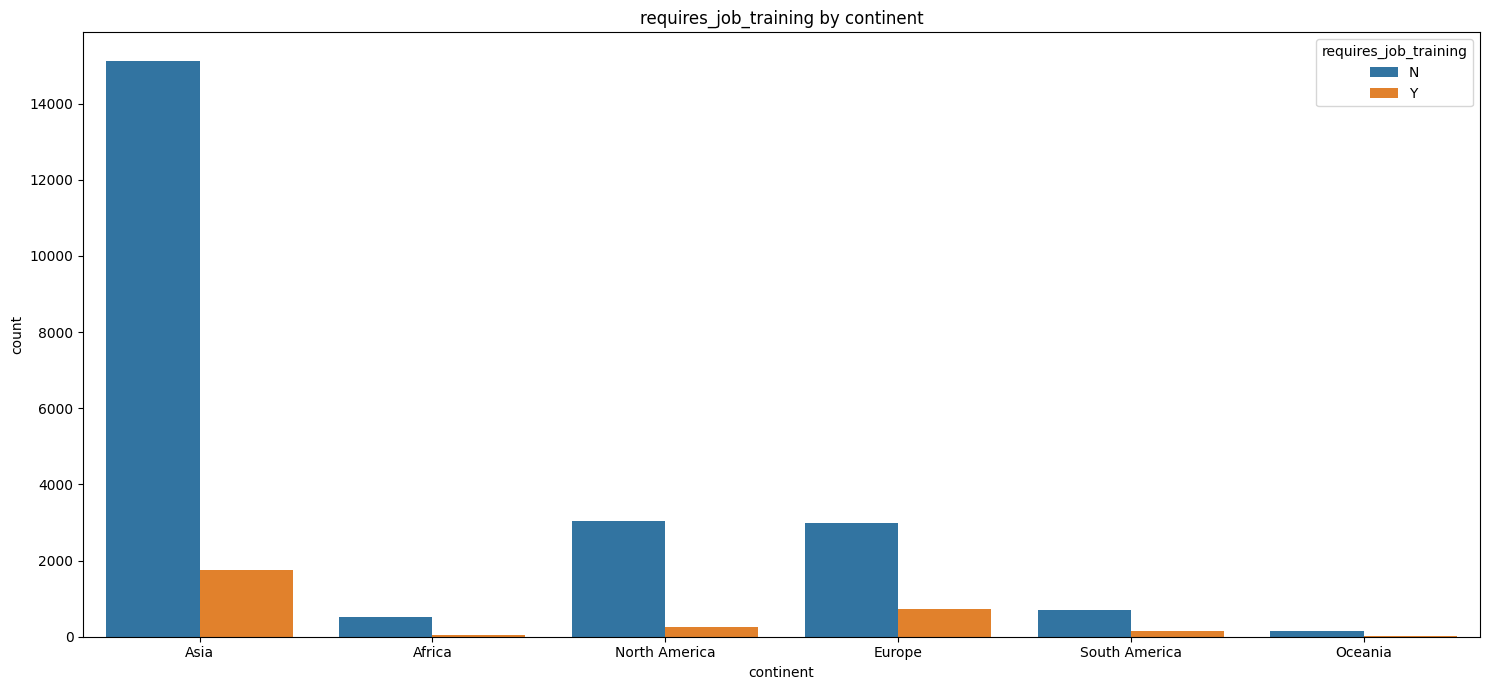

In [291]:
result = dc.get_compared_detials(df,'continent','requires_job_training')

#### Insight:
- Most of all continent applications not requiring job training but go indepth once

In [27]:
result['data_frame']

,education_of_employee,N_entire_data,Y_entire_data,N_individual_data,Y_individual_data
0,Bachelor's,17.06,23.10,42.49,57.51
1,Doctorate,3.69,4.91,42.93,57.07
2,High School,5.48,7.94,40.82,59.18
3,Master's,15.67,22.14,41.45,58.55


In [28]:
for i,j in result['insight_data'].items():
    print(f'- {i}: {j}')

- High has_job_experience with education_of_employee Entire_data comparision: Bachelor's
- Low has_job_experience with education_of_employee Entire_data comparision: Doctorate
- High has_job_experience with education_of_employee individual comparision: High School
- Low has_job_experience with education_of_employee individual comparision: High School


#### Insight:
Note: values are in the form percentages
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>continent</th>
      <th>N_entire_data</th>
      <th>Y_entire_data</th>
      <th>N_individual_data</th>
      <th>Y_individual_data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Africa</td>
      <td>2.00</td>
      <td>0.16</td>
      <td>92.56</td>
      <td>7.44</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Asia</td>
      <td>59.31</td>
      <td>6.86</td>
      <td>89.63</td>
      <td>10.37</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Europe</td>
      <td>11.75</td>
      <td>2.90</td>
      <td>80.20</td>
      <td>19.80</td>
    </tr>
    <tr>
      <th>3</th>
      <td>North America</td>
      <td>11.95</td>
      <td>0.97</td>
      <td>92.47</td>
      <td>7.53</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Oceania</td>
      <td>0.64</td>
      <td>0.11</td>
      <td>84.90</td>
      <td>15.10</td>
    </tr>
    <tr>
      <th>5</th>
      <td>South America</td>
      <td>2.76</td>
      <td>0.59</td>
      <td>82.39</td>
      <td>17.61</td>
    </tr>
  </tbody>
</table>
</div>

- High requires_job_training with continent Entire_data comparision: Asia
- Low requires_job_training with continent Entire_data comparision: Oceania
- High requires_job_training with continent individual comparision: Europe
- Low requires_job_training with continent individual comparision: Europe


##### At which education level is High and Low job training required?

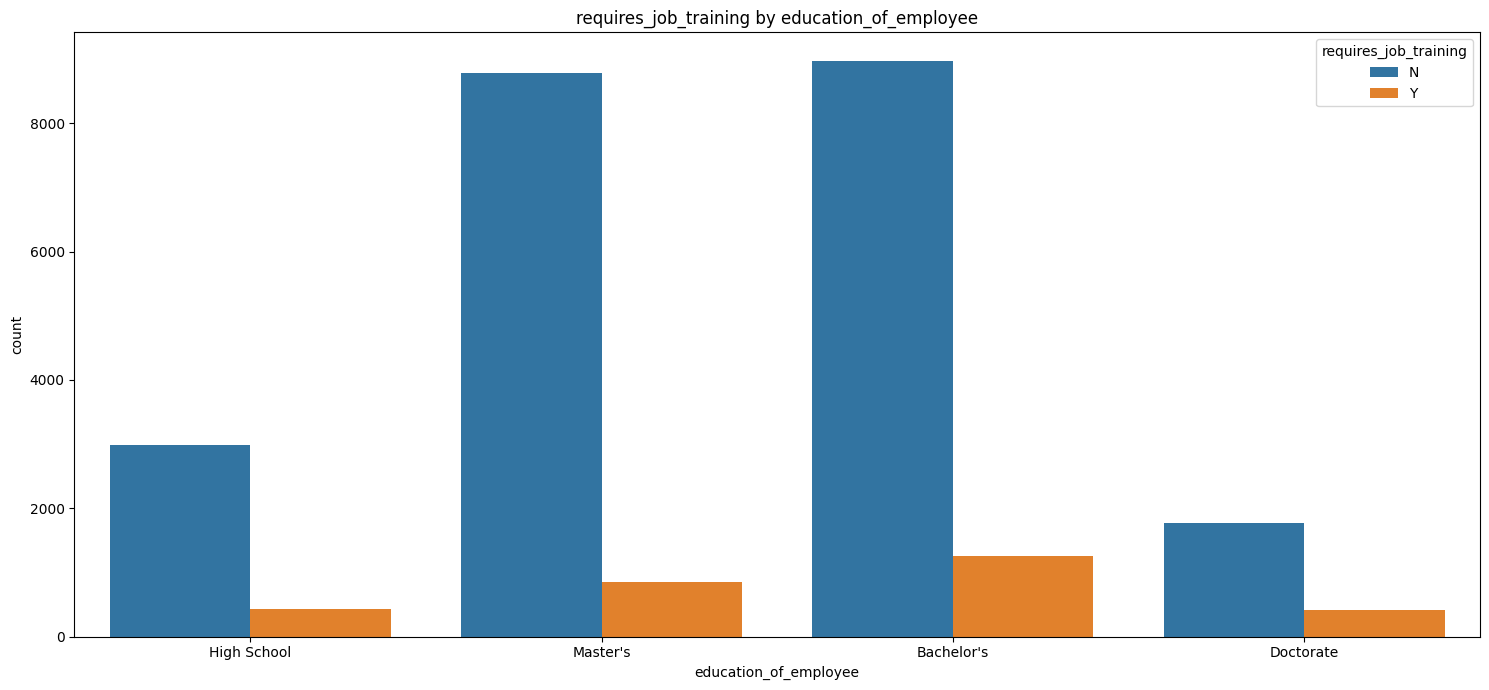

In [296]:
result = dc.get_compared_detials(df,'education_of_employee','requires_job_training')

#### Insight:
Most of education level not required job training  but go indepth check the percentage

In [29]:
result['data_frame']

,education_of_employee,N_entire_data,Y_entire_data,N_individual_data,Y_individual_data
0,Bachelor's,17.06,23.10,42.49,57.51
1,Doctorate,3.69,4.91,42.93,57.07
2,High School,5.48,7.94,40.82,59.18
3,Master's,15.67,22.14,41.45,58.55


In [30]:
for i,j in result['insight_data'].items():
    print(f'- {i}: {j}')

- High has_job_experience with education_of_employee Entire_data comparision: Bachelor's
- Low has_job_experience with education_of_employee Entire_data comparision: Doctorate
- High has_job_experience with education_of_employee individual comparision: High School
- Low has_job_experience with education_of_employee individual comparision: High School


#### Insight:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>education_of_employee</th>
      <th>N_entire_data</th>
      <th>Y_entire_data</th>
      <th>N_individual_data</th>
      <th>Y_individual_data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Bachelor's</td>
      <td>35.21</td>
      <td>4.96</td>
      <td>87.66</td>
      <td>12.34</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Doctorate</td>
      <td>6.98</td>
      <td>1.62</td>
      <td>81.11</td>
      <td>18.89</td>
    </tr>
    <tr>
      <th>2</th>
      <td>High School</td>
      <td>11.73</td>
      <td>1.69</td>
      <td>87.43</td>
      <td>12.57</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Master's</td>
      <td>34.48</td>
      <td>3.33</td>
      <td>91.20</td>
      <td>8.80</td>
    </tr>
  </tbody>
</table>
</div>

- High requires_job_training with education_of_employee Entire_data comparision: Bachelor's
- Low requires_job_training with education_of_employee Entire_data comparision: Doctorate
- High requires_job_training with education_of_employee individual comparision: Doctorate
- Low requires_job_training with education_of_employee individual comparision: Doctorate


#### If experienced individuals require job training, verify if it's stated in their applications.

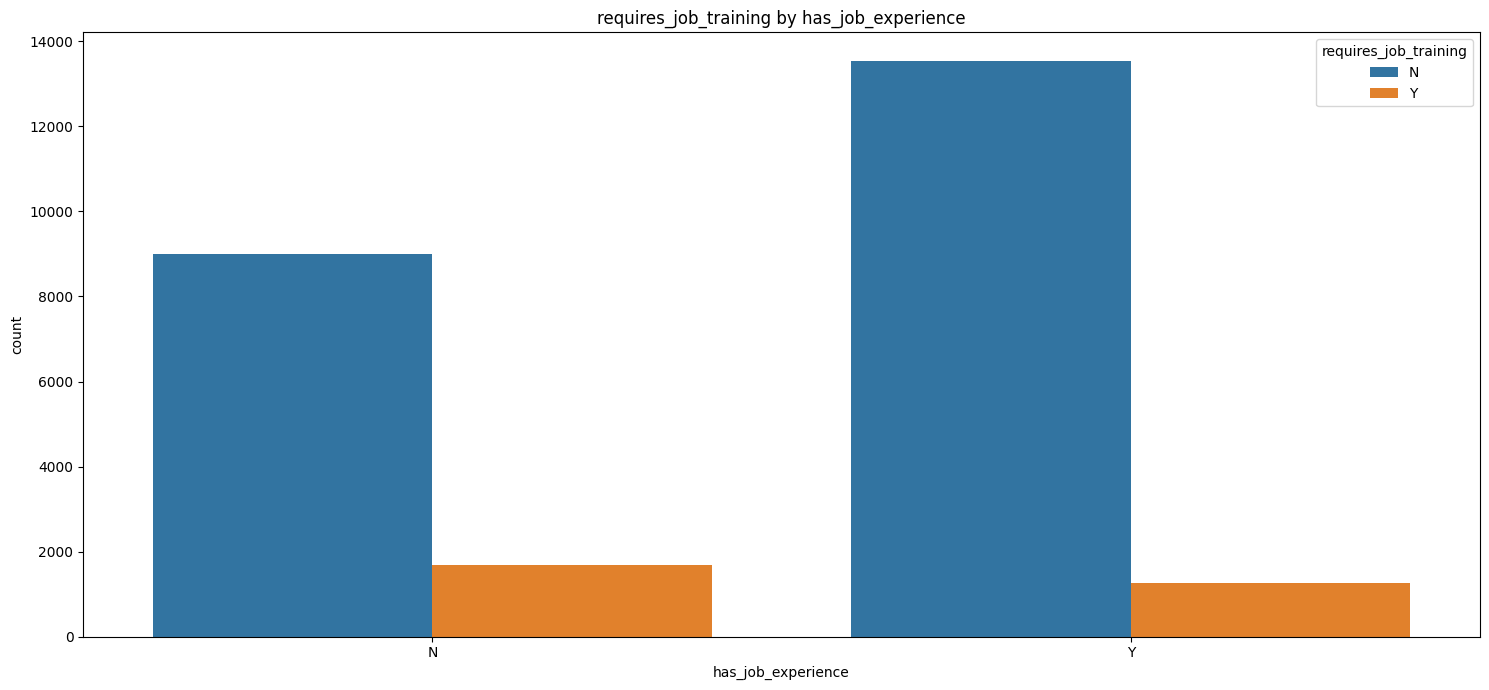

In [301]:
result = dc.get_compared_detials(df,'has_job_experience','requires_job_training')

#### Insight:
- Experienced individuals and non-experinced mostly not required job training

##### What is the highest number of employees in the Employer's company?

<Axes: xlabel='no_of_employees', ylabel='Count'>

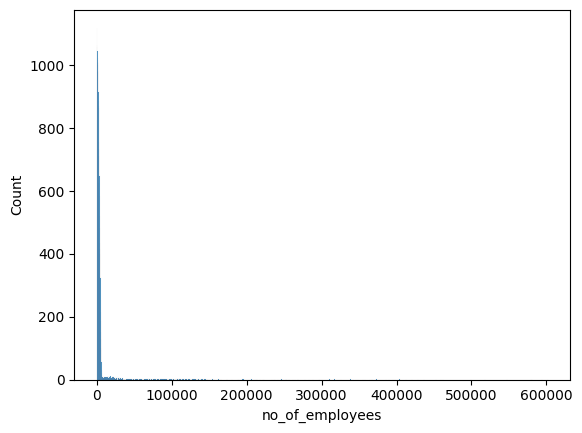

In [28]:
sns.histplot(df['no_of_employees'])

In [29]:
df['no_of_employees'].describe()

count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

##### Which established year of company have high number of employees?

In [31]:
year_wise_employees_data = df.groupby('yr_of_estab')['no_of_employees'].sum().reset_index()
year_wise_employees_data

,yr_of_estab,no_of_employees
0,1800,57887
1,1801,19888
2,1804,253660
3,1807,10793
4,1809,16357
...,...,...
194,2012,2629710
195,2013,2601138
196,2014,937978
197,2015,194368


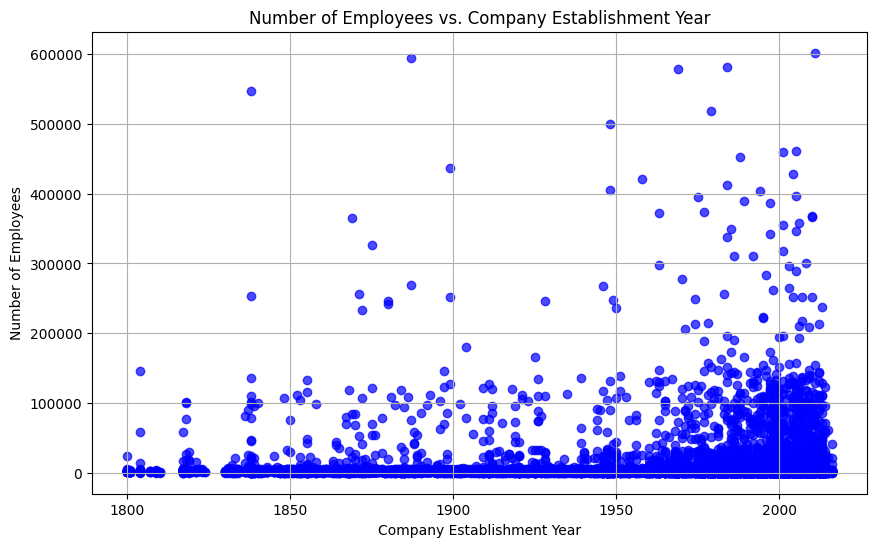

In [32]:
# Extract columns
estb_year = df['yr_of_estab']
num_employees = df['no_of_employees']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(estb_year, num_employees, c='blue', alpha=0.7)
plt.title('Number of Employees vs. Company Establishment Year')
plt.xlabel('Company Establishment Year')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

In [33]:
year_wise_employees_data = df.groupby('yr_of_estab')['no_of_employees'].sum().reset_index()

year_wise_employees_data[year_wise_employees_data['no_of_employees'] == year_wise_employees_data['no_of_employees'].min()]

,yr_of_estab,no_of_employees
13,1824,855


In [34]:
year_wise_employees_data[year_wise_employees_data['no_of_employees'] == year_wise_employees_data['no_of_employees'].max()]

,yr_of_estab,no_of_employees
187,2005,6006132


#### Insight:
- The number of employees has increased annually, with some years showing particularly high values, indicating possible outliers.

- low employees in the company established year with no of employee
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>yr_of_estab</th>
      <th>no_of_employees</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1824</td>
      <td>855</td>
    </tr>
  </tbody>
</table>
</div>



- Higher employees in the company established year and no of employee
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>yr_of_estab</th>
      <th>no_of_employees</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2005</td>
      <td>6006132</td>
    </tr>
  </tbody>
</table>
</div>


#### Which region has a high number of companies established?

##### Education-wise region of interest of working ?

In [36]:
d= df.groupby(['education_of_employee'])['region_of_employment'].value_counts().reset_index()
d

,education_of_employee,region_of_employment,count
0,Bachelor's,South,2991
1,Bachelor's,West,2925
2,Bachelor's,Northeast,2874
3,Bachelor's,Midwest,1315
4,Bachelor's,Island,129
5,Doctorate,West,714
6,Doctorate,Northeast,656
7,Doctorate,South,541
8,Doctorate,Midwest,256
9,Doctorate,Island,25


In [37]:
d.groupby('education_of_employee')['count'].max()

education_of_employee
Bachelor's     2991
Doctorate       714
High School     934
Master's       2760
Name: count, dtype: int64

In [38]:
d.groupby('education_of_employee')['count'].idxmax()

education_of_employee
Bachelor's      0
Doctorate       5
High School    10
Master's       15
Name: count, dtype: int64

In [39]:
d.loc[d.groupby('education_of_employee')['count'].idxmax()]


,education_of_employee,region_of_employment,count
0,Bachelor's,South,2991
5,Doctorate,West,714
10,High School,South,934
15,Master's,Northeast,2760


#### Insights:
- Below is a table containing the types of degrees and their respective regions of employment. It also includes the number of applications received in each region, highlighting the region with the highest number of applications.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>education_of_employee</th>
      <th>region_of_employment</th>
      <th>No of Applications by region</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Bachelor's</td>
      <td>South</td>
      <td>2991</td>
    </tr>
    <tr>
      <td>Doctorate</td>
      <td>West</td>
      <td>714</td>
    </tr>
    <tr>
      <td>High School</td>
      <td>South</td>
      <td>934</td>
    </tr>
    <tr>
      <td>Master's</td>
      <td>Northeast</td>
      <td>2760</td>
    </tr>
  </tbody>
</table>
</div>

#### Which region of employment offers high salaries? 

In [40]:
d= df.groupby(['region_of_employment','unit_of_wage'])['prevailing_wage'].max().reset_index()
d

,region_of_employment,unit_of_wage,prevailing_wage
0,Island,Hour,725.1272
1,Island,Week,193740.8800
2,Island,Year,289878.6800
3,Midwest,Hour,981.7090
4,Midwest,Month,246099.9300
5,Midwest,Week,174046.4800
6,Midwest,Year,319210.2700
7,Northeast,Hour,999.9195
8,Northeast,Month,264362.9500
9,Northeast,Week,229950.7000


In [41]:
d.groupby('unit_of_wage').max().reset_index()

,unit_of_wage,region_of_employment,prevailing_wage
0,Hour,West,999.9195
1,Month,West,264362.9500
2,Week,West,280175.9500
3,Year,West,319210.2700


#### Insights:
 Regions_employement with maximun prevailing_wage

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: center;">
      <th>unit_of_wage</th>
      <th>region_of_employment</th>
      <th>Max prevailing_wage</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Hour</td>
      <td>West</td>
      <td>999.9195</td>
    </tr>
    <tr>
      <td>Month</td>
      <td>West</td>
      <td>264362.9500</td>
    </tr>
    <tr>
      <td>Week</td>
      <td>West</td>
      <td>280175.9500</td>
    </tr>
    <tr>
      <td>Year</td>
      <td>West</td>
      <td>319210.2700</td>
    </tr>
  </tbody>
</table>
</div>

- Maximum prevailing wage is provided for the west region of employment. The prevailing wage is paid hourly, monthly, and yearly, so we need to consider all three.

#### Which continent has high certified and denials?

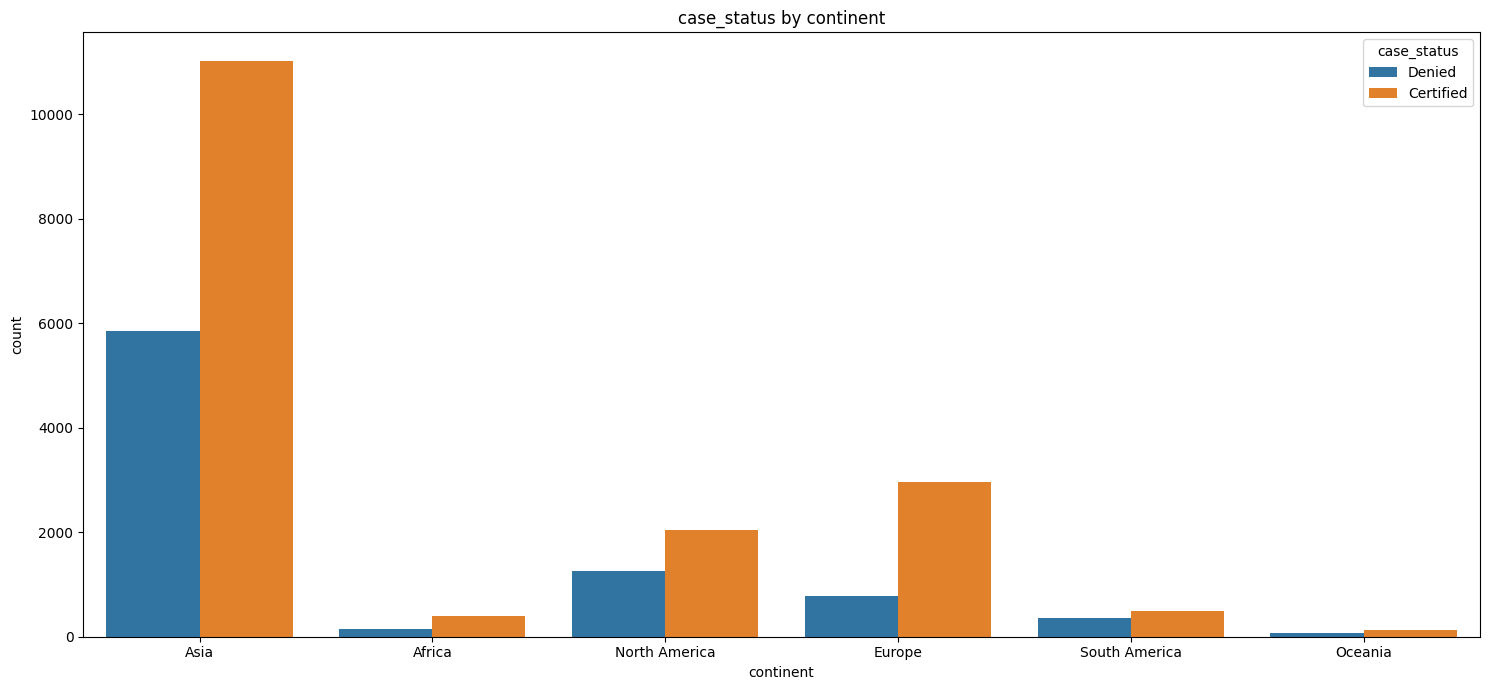

In [42]:
result = dc.get_compared_detials(df,index_column='continent',compared_column='case_status')

#### Insight:
- Most of the data from all continents is certified, although the dataset is imbalanced (case_status={'Certified': 68%, 'Denied': 32%}). When making comparisons, "Certified" is often the maximum due to the imbalance in the dataset.

##### what is Highest, average, and lowest privilege wage of the case study is certified & Denied?

In [54]:
df.groupby('case_status')['prevailing_wage'].describe().reset_index()

,case_status,count,mean,std,min,25%,50%,75%,max
0,Certified,17018.0,77293.619243,52042.715576,2.1367,38375.330,72486.27,108879.1075,318446.05
1,Denied,8462.0,68748.681580,53890.166031,2.9561,23497.295,65431.46,105097.6400,319210.27


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>case_status</th>
      <th>No of application</th>
      <th>Average previaling wage</th>
      <th>minimum prevailing_wage</th>
      <th>maximum prevailing_wage</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Certified</td>
      <td>17018.0</td>
      <td>77293.619243</td>
      <td>2.1367</td>
      <td>318446.05</td>
    </tr>
    <tr>
      <td>Denied</td>
      <td>8462.0</td>
      <td>68748.681580</td>
      <td>2.9561</td>
      <td>319210.27</td>
    </tr>
  </tbody>
</table>
</div>

#### All Insights :

1.	no null values in dataset and data set contains dtypes: float64(1), int64(2), object(9).
2.	minimum employees in company is -26 so there is chance of hesitation of putting data.
3.	The maximum number of employees in the company is 602069, and the average number of employees in the company is 5667. Therefore, there are outliers evident when plotted.
4.	Companies have been established between 1800 and 2016 according to the data records.
5.	Most of the companies were established between 1979 and 2002.
6.	The minimum prevailing wage is 2.1367, and it may be hourly based, while the maximum is 319210 on a yearly basis.
7.	Employees can expect an average salary of 74455.
8.	When dealing with data, if there is only one value like -26, it is generally considered a nan value. However, in this case, there are 5 categories, so let's explore in depth to see if these values are related to any other column.
9.	Most of the data is from the continent Asia and the education information pertains to Bachelors. Additionally, half of the data for case status is certified, so we should keep it as it is.
10.	There is a low prevailing wage, which is mostly hourly-based.
11.	A large majority of the applications are from Asia, with more than 16000 applications, making up 66% of the entire dataset.
12.	Degree related to Bachelor's and Master's programs typically receive more applications.
13.	More than 14000 applications, which is equal to 58% of the entire data, have job experience.
14.	More people have shown interest in jobs in the Northeast (more than 7000 applications, 28% of the entire applications) and the South (more than 6000 applications, 27.54% of the entire applications).
15.	One of the major reasons for the interest in the Northeast and South is the economic opportunities.
16.	The Northeast is home to major financial hubs like New York City and Boston, offering abundant job opportunities in finance, technology, education, and healthcare.
17.	The Southeast has experienced significant economic growth in recent decades, with cities like Atlanta, Charlotte, and Miami becoming major business and cultural centers.
18.	Most companies have shown interest in paying wages in yearly payments, with more than 20000 application data indicating that 90% of entire applications are based on a yearly pay structure.
19.	Most applications require full-time positions in the job, accounting for 89.38% of all applications.
20.	The "case_status," our target feature, is mostly related to certified applications, accounting for 66.79% of the entire dataset, which indicates that it is an imbalanced dataset.
21.	Applications from both Bachelor's and Master's degree holders are high in all continents.
22.	Applications from Master's degree holders are particularly high in North America and Africa.
23.	Applications from Bachelor's degree holders are particularly high in Asia and Europe.
24.	Applications from Doctorate degree holders are high in Europe.
25.	Applications from high school level students are low across all continents.
26.	As per the visa application, all continents have high job experience in applications.
27.	High job experience compared to entire continent data: Asia
28.	Low job experience compared to entire continent data: Oceania
29.	High job experience compared to individual continent: Africa
30.	Low job experience compared to individual continent: Africa 
31.	According to the application, all continents have high job experience in applications.
32.	High job experience with employees' education comparison: Bachelor's
33.	Low job experience with employees' education comparison: Doctorate
34.	High job experience with individual employee's education: High School
35.	Low job experience with individual employee's education: High School
36.	Most of all continent applications not requiring job training
37.	High requires_job_training with continent Entire_data comparision: Asia
38.	Low requires_job_training with continent Entire_data comparision: Oceania
39.	 High requires_job_training with continent individual comparision: Europe
40.	 Low requires_job_training with continent individual comparision: Europe
41.	The number of employees has increased annually, with some years showing particularly high values, indicating possible outliers.
42.	

